In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.figsize'] = (15,12)
matplotlib.rcParams['xtick.labelsize'] = 35
matplotlib.rcParams['ytick.labelsize'] = 35
matplotlib.rcParams['font.size'] = 35
matplotlib.rcParams['axes.labelsize'] = 50
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = 5
matplotlib.rcParams['lines.linewidth'] = 10.0     # line width in points
#matplotlib.rcParams['lines.color'] = 'blue'    # has no affect on plot(); see axes.prop_cycle
matplotlib.rcParams['lines.markersize'] = 8           #

# 1. Party game: squeezed

One guessing game, called “squeezed”, is very common in parties. It consists of a player,
the chooser, who writes down a number between 00–99. The other players then take
turns guessing numbers, with a catch: if one says the chosen number, he loses and has
to do something daft. If the guessed number is not the chosen one, it splits the range.
The chooser then states the part which contains the chosen number. If the new region
only has one number, the chooser is said to be “squeezed” and is punished. An example
of gameplay would be:

* Chooser writes down (secretly) his number (let’s say, 30).
 * Chooser: “State a number between 00 and 99.”
 * Player: “42”.
 * Chooser: “State a number between 00 and 42.”
 * Player: “26”.
 * Chooser: “State a number between 26 and 42.”

    $\vdots$
    
 * Chooser: “State a number between 29 and 32.”
 * Player: “31”.
* Chooser dances some very silly children song.

Implement this game in Python, where the computer is the chooser.

**Useful:** $\mathtt{random.randint()}$ and $\mathtt{input()}$.

In [ ]:
from random import randint

secret_num = randint(0,99)
print(secret_num)
interval = [0,99]
while 1:
    guessed_num = int(input("State a number between %d and %d: " % tuple(interval)))
    if guessed_num > interval[1]:
        print("Number is to large, we said between %d and %d" % tuple(interval))
    elif guessed_num < interval[0]:
        print("Number is to small, we said between %d and %d" % tuple(interval))
    elif guessed_num == secret_num:
        print("Soooory, you hit the number - haha, you have to kiss your neighbor! Okay, let's say only on the cheek.")
        break
    elif guessed_num < secret_num:
        interval[0] = guessed_num
    elif guessed_num > secret_num:
        interval[1] = guessed_num
        
    if interval[0]+1 == secret_num and interval[1]-1 == secret_num:
        print("Okay, you won. I'll do the silly dance for you if you provide me with legs.")
        break


# 2. Cartesian/Polar Coordinates

Points may be given in polar $(r, \theta)$ or cartesian coordinates $(x, y)$, see Figure 1.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Polar_coordinates_.png" />

Figure 1. Relationship between polar and cartesian coordinates.

## 2.1 Polar to cartesian
Write a function $\mathtt{pol2cart}$, that takes a tuple $\mathtt{(r, θ)}$ in polar coordinates and
returns a tuple in cartesian coordinates.

## 2.2 Cartesian to polar

Write the inverse function $\mathtt{cart2pol}$, such that $\mathtt{pol2cart( cart2pol( ( x,y) ) )}$ is $\mathtt{(x, y)}$ for any input $\mathtt{(x, y)}$.

## 2.3 Extend the two functions:
such that they can in addition handle lists of tuples.

In [161]:
from math import sqrt, atan, cos, sin
def pol2cart( pts ):
    if isinstance( pts, tuple ):
        pts=[pts];
    c=[ (r*cos(th), r*sin(th)) for (r,th) in pts ];
    return c if len(c)>1 else c[0]

def cart2pol( pts ):
    if isinstance( pts, tuple ):
        pts=[pts];
    p=[ (sqrt(x**2+y**2), atan(float(y)/x)) for (x,y) in pts ];
    return p if len(p)>1 else p[0]


pts=[(2,1), (3.4, 5.3)];
print("Cartesian : ",pts)
print("Polar     : ",cart2pol( pts ))
print("And Back  : ",pol2cart(cart2pol( pts )))


Cartesian :  [(2, 1), (3.4, 5.3)]
Polar     :  [(2.23606797749979, 0.4636476090008061), (6.296824596572466, 1.0004130451449549)]
And Back  :  [(2.0, 1.0), (3.4000000000000004, 5.3)]


# 3. A bit of statistics

Draw $N=10000$ unifromly distributed random numbers (use `np.random.uniform`, for example). Plot it's histogram and check that it looks uniform. 

Now draw another such sample, and sum the two. How does the histogram of the sum look like? 

Continue to sum $3,4,5,..$ such samples and keep plotting the histogram. It should quickly start to look like a gaussian.

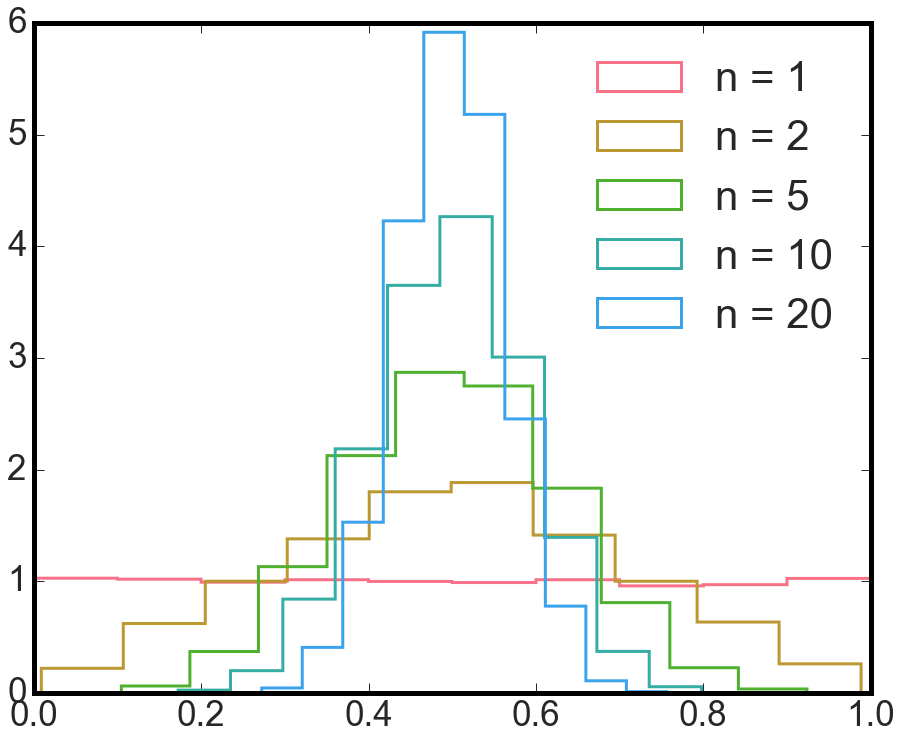

In [150]:
sample_size = 10000
n_max = 100
num_hists = 5
num_repeats = np.arange(1, n_max, n_max//num_hists)

num_repeats = [1,2,5, 10, 20]

variances = []
for repeat in num_repeats:
    data = np.random.uniform(size = (repeat, sample_size))
    means = data.mean(axis = 0)
    variances.append(means.var())
    plt.hist(means, label ="n = %d"%repeat,\
             normed = True, histtype = 'step', lw = 3)
plt.legend()

# 4. Some numpy array

## Defeat optical illusions
This is a quite famous optical illusion: 

<img src="images/ill.png"/>

The rows are perfectly straight, althought they appear crooked. 
Use numpy and slicing operations to verify for yourself that they are indeed so.

The code for loading the image as a numpy array is provided below:

([], <a list of 0 Text xticklabel objects>)

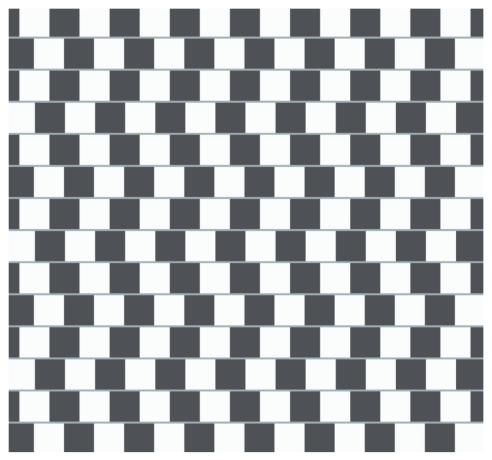

In [114]:
import scipy.ndimage
im = scipy.ndimage.imread("images/ill.png")
plt.imshow(im)
plt.grid(0)
plt.yticks([])
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

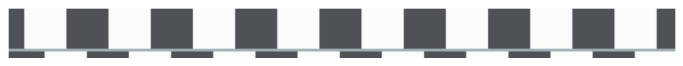

In [28]:
plt.imshow(im[:80, :])
plt.grid(0)
plt.yticks([])
plt.xticks([])

## Compute $\pi$:
Below is an array which, when plotted, produces an image of a circle.
Compute the value of $\pi$ by counting the number of black pixels in the 
array.

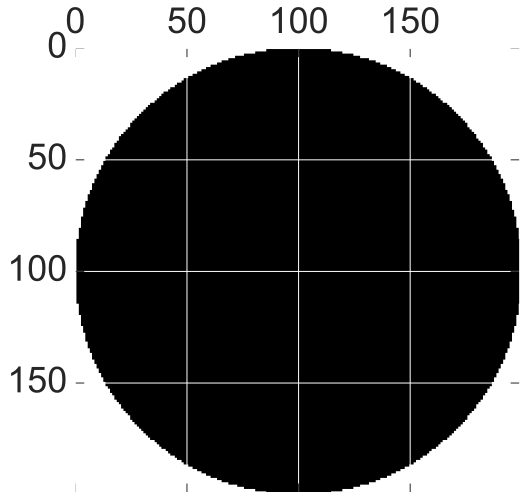

In [116]:
x = np.arange(-1,1, 0.01)
y = np.arange(-1,1, 0.01)

X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2

Z = np.where(Z<1, 1, 0)
plt.matshow(Z)

In [40]:
np.argwhere(Z).shape[0]*4/Z.size

3.1401

## Twist and turn
Convert this image:
<img width = "400px" src = "images/mosaic_grey.png" />

to

<img width = "400px" src = "images/mosaic_conv.png" />

In [115]:
mos = scipy.ndimage.imread("images/mosaic_grey.png")
plt.imshow(mos)

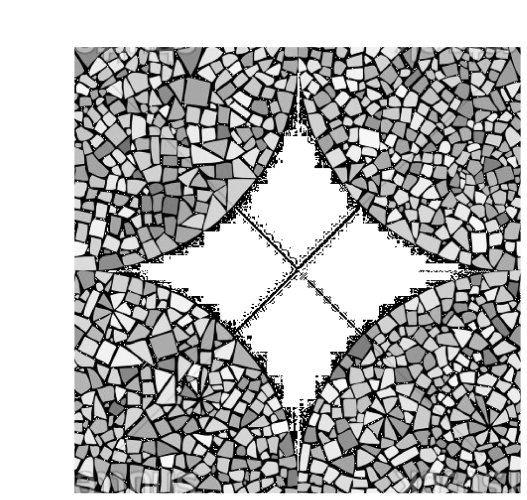

In [124]:
l = mos.shape[0]
N = mos.copy()
N[:l//2,:l//2] = mos[l//2:0:-1,l//2:0:-1]
N[l//2:,l//2:] = mos[-1:l//2-1:-1,-1:l//2-1:-1]
N[l//2:,:l//2] = mos[-1:l//2-1:-1,l//2:0:-1]
N[:l//2,l//2:] = mos[l//2:0:-1,-1:l//2-1:-1]

N = np.where(N==255,0,N)
#N[l//4:3*l//4, l//4:3*l//4] = 1-N[l//4:3*l//4, l//4:3*l//4]
plt.matshow(N)
plt.axis('off')
plt.savefig("images/mosaic_conv.png", bbox_inches = 'tight')
plt.grid(False)